<a href="https://colab.research.google.com/github/tronschell/MGIS355FinalProject/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans

Read the CSV into a Dataframe and the seperator is \t

In [ ]:
df = pd.read_csv("marketing_campaign.csv", delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


We impute the median instead of the mean for the NA values in the Income column as there are large outliers that the Median more resistant to.

In [ ]:
df_median = df["Income"].median()
df = df.fillna(value=df["Income"].median())

We are going to add a new column or "feature" here by adding up all the purchases the particular individual made through all mediums.

In [ ]:
total_purchases = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_purchases'] = total_purchases

We have some weird looking Marital status's but it will help us when we are converting this categorical data into a numerical data value.

In [ ]:
print(df.Marital_Status.unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


We are going to encode our Categorical Education data.<br>
Graduation = 1<br>
PhD = 2<br>
Master = 3<br>
2n Cycle = 4<br>
Basic = 5

In [ ]:
for i in df['Education']:
  if i == "Graduation":
    df['Education'] = df['Education'].replace("Graduation", 1)
  elif i == "PhD":
     df['Education'] =df['Education'].replace("PhD", 2)
  elif i == "Master":
    df['Education'] = df['Education'].replace("Master", 3)
  elif i == "2n Cycle":
     df['Education'] =df['Education'].replace("2n Cycle", 4)
  elif i == "Basic":
     df['Education'] =df['Education'].replace("Basic", 5)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchases
0,5524,1957,1,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,25
1,2174,1954,1,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,6
2,4141,1965,1,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,21
3,6182,1984,1,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,8
4,5324,1981,2,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,19


Next we are going to encode our Categorical Marital Status data. <br>
Single & Alone = 1 <br>
Married = 2<br>
Together = 3<br>
Divorced = 4<br>
Widow = 5<br>
Absurd = 6<br>
YOLO = 7

In [ ]:
for p in df['Marital_Status']:
  if p == "Single":
    df['Marital_Status'] = df['Marital_Status'].replace('Single', 1)
  elif p == "Alone":
    df['Marital_Status'] = df['Marital_Status'].replace('Alone', 1)
  elif p == "Married":
    df['Marital_Status'] = df['Marital_Status'].replace('Married', 2)
  elif p == "Together":
    df['Marital_Status'] = df['Marital_Status'].replace('Together', 3)
  elif p == "Divorced":
    df['Marital_Status'] = df['Marital_Status'].replace('Divorced', 4)
  elif p == "Widow":
    df['Marital_Status'] = df['Marital_Status'].replace('Widow', 5)
  elif p == "Absurd":
    df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 6)
  elif p == "YOLO":
    df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 7)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchases
0,5524,1957,1,1,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,25
1,2174,1954,1,1,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,6
2,4141,1965,1,3,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,21
3,6182,1984,1,3,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,8
4,5324,1981,2,2,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,19


Here we are only going to take the things that we really need from the original dataset.

In [ ]:
X = df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'total_purchases']]

We're going to split the X dataset into 4 different datasets all based on the amount of purchases. However, we will split them based on certain features.

When we run the KMeans algorithm, it will give us the clusters based on one feature of each dataframe making it easier to interperate, visualize, and describe.

In [ ]:
birth_df = X[['Year_Birth', 'total_purchases']]
edu_df = X[['Education', 'total_purchases']]
ms_df = X[['Marital_Status', 'total_purchases']]
income_df = X[['Income', 'total_purchases']]

Next we are going to make a function for our KMeans model. We are making it a function because we want to return a few things:<br>
The dataframe with the Centroids so we know where the clusters are based on.<br>
The dataframe with the labels that the KMeans algorithm gave us so we color code our graphs.<br>
Our silhouette score to optimize for intra and inter cluster distances. <br>

In [ ]:
def KMeansAlgorithm(data, i):
    #KMeans algorithm
    clustering = KMeans(n_clusters =i,init='k-means++', random_state=42)
    clustering.fit(data)
    
    #cluster data
    centroids  = clustering.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns = ['X', 'Y'])
    
    #label data for coloring in the graphs
    label = clustering.labels_
    df["label"] = label

    #silhouette score for optimizing number of clusters
    score = metrics.silhouette_score(data, label)

    return centroids_df, score, label

In the next couple of cells will utilize the KMeansAlgorith function in order to plot our cluster graphs. <br>
We want to optimize the amount of clusters we have for each of the features's graphs i.e. find the most amount of clusters in the Income/TotalPurchased graph.<br>
We will achieve the optimal amount of clusters using "Silhouette analysis" which is the "silhouette_score" function we used in our KMeansAlgorithm function.

Text(0, 0.5, 'score Values')

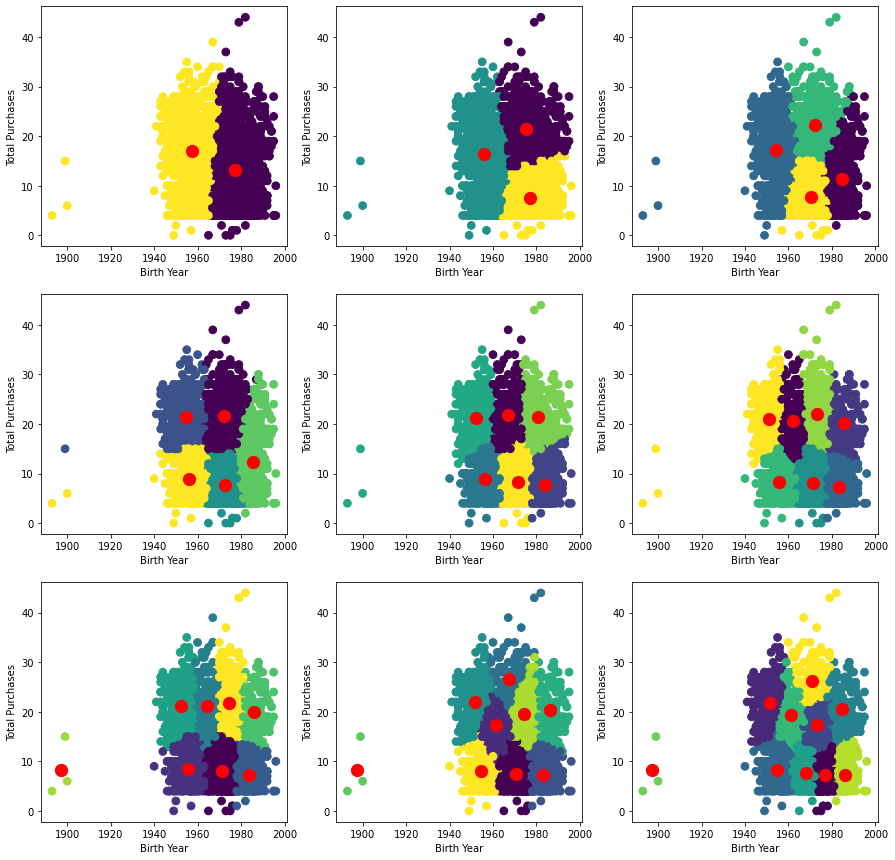

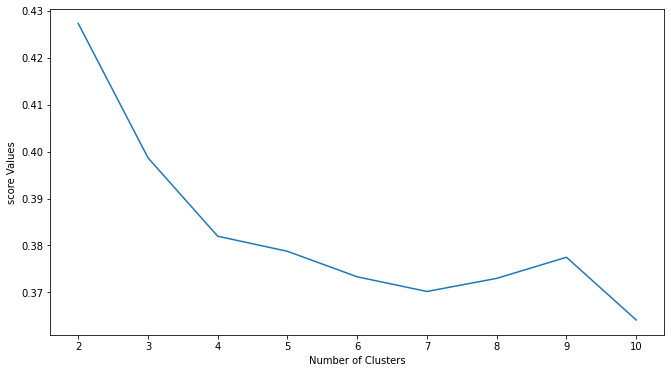

In [ ]:
fig1 = plt.figure(figsize=(15, 15))
birth_score_values = []
for i in range(2, 11):
  birth_centroids, birth_score, birth_label,  = KMeansAlgorithm(birth_df, i)
  birth_score_values.append(birth_score)

  sub = fig1.add_subplot(330 + i - 1)
  sub.scatter(birth_df["Year_Birth"], birth_df["total_purchases"], s=60, c=df["label"],)
  sub.scatter(birth_centroids["X"], birth_centroids["Y"], s=150, c="r")
  sub.set_xlabel('Birth Year')
  sub.set_ylabel('Total Purchases')


plt.figure(figsize = (11 ,6))
plt.plot(np.arange(2,11) , birth_score_values)
plt.xlabel("Number of Clusters")
plt.ylabel("score Values")


From the above sihloette score graph, we can see that we should chose 9 clusters for our KMeans graph. This allows us to maximize the amount of inter-cluster distance and to minimize the intra-cluster distance. <br>
<strong>What is inter and intra cluster distance?</strong> <br>
Inter-Cluster distance is the space between the <strong>other</strong> clusters. <br>
Intra-Cluster distance is the space between the datapoints <strong>within</strong> a cluster.


Text(0, 0.5, 'score Values')

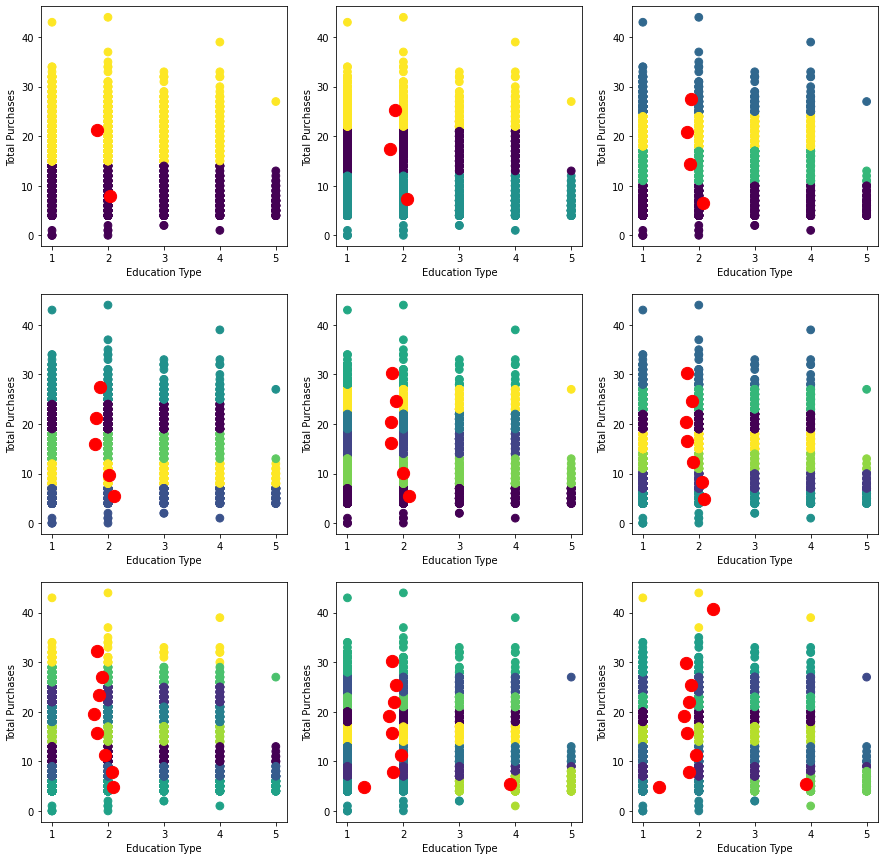

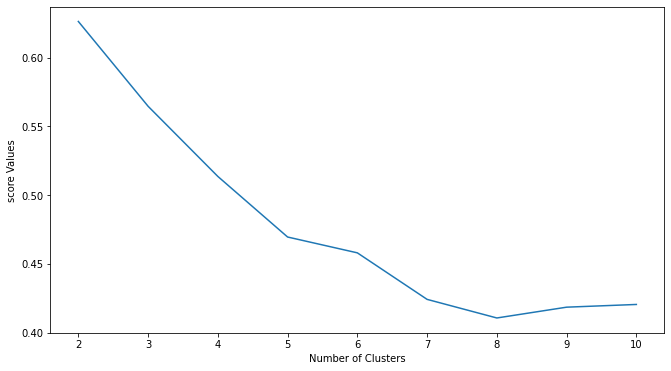

In [ ]:
fig1 = plt.figure(figsize=(15, 15))
edu_score_values = []
for i in range(2, 11):
  edu_centroids, edu_score, edu_label = KMeansAlgorithm(edu_df, i)
  edu_score_values.append(edu_score)

  sub = fig1.add_subplot(330 + i - 1)
  sub.scatter(edu_df["Education"], edu_df["total_purchases"], s=60, c=df["label"],)
  sub.scatter(edu_centroids["X"], edu_centroids["Y"], s=150, c="r")
  sub.set_xlabel('Education Type')
  sub.set_ylabel('Total Purchases')


plt.figure(figsize = (11 ,6))
plt.plot(np.arange(2,11) , edu_score_values)
plt.xlabel("Number of Clusters")
plt.ylabel("score Values")


From the above sihloette score graph, we can see that we should chose 6 clusters for our KMeans graph. This allows us to maximize the amount of inter-cluster distance and to minimize the intra-cluster distance.

Text(0, 0.5, 'score Values')

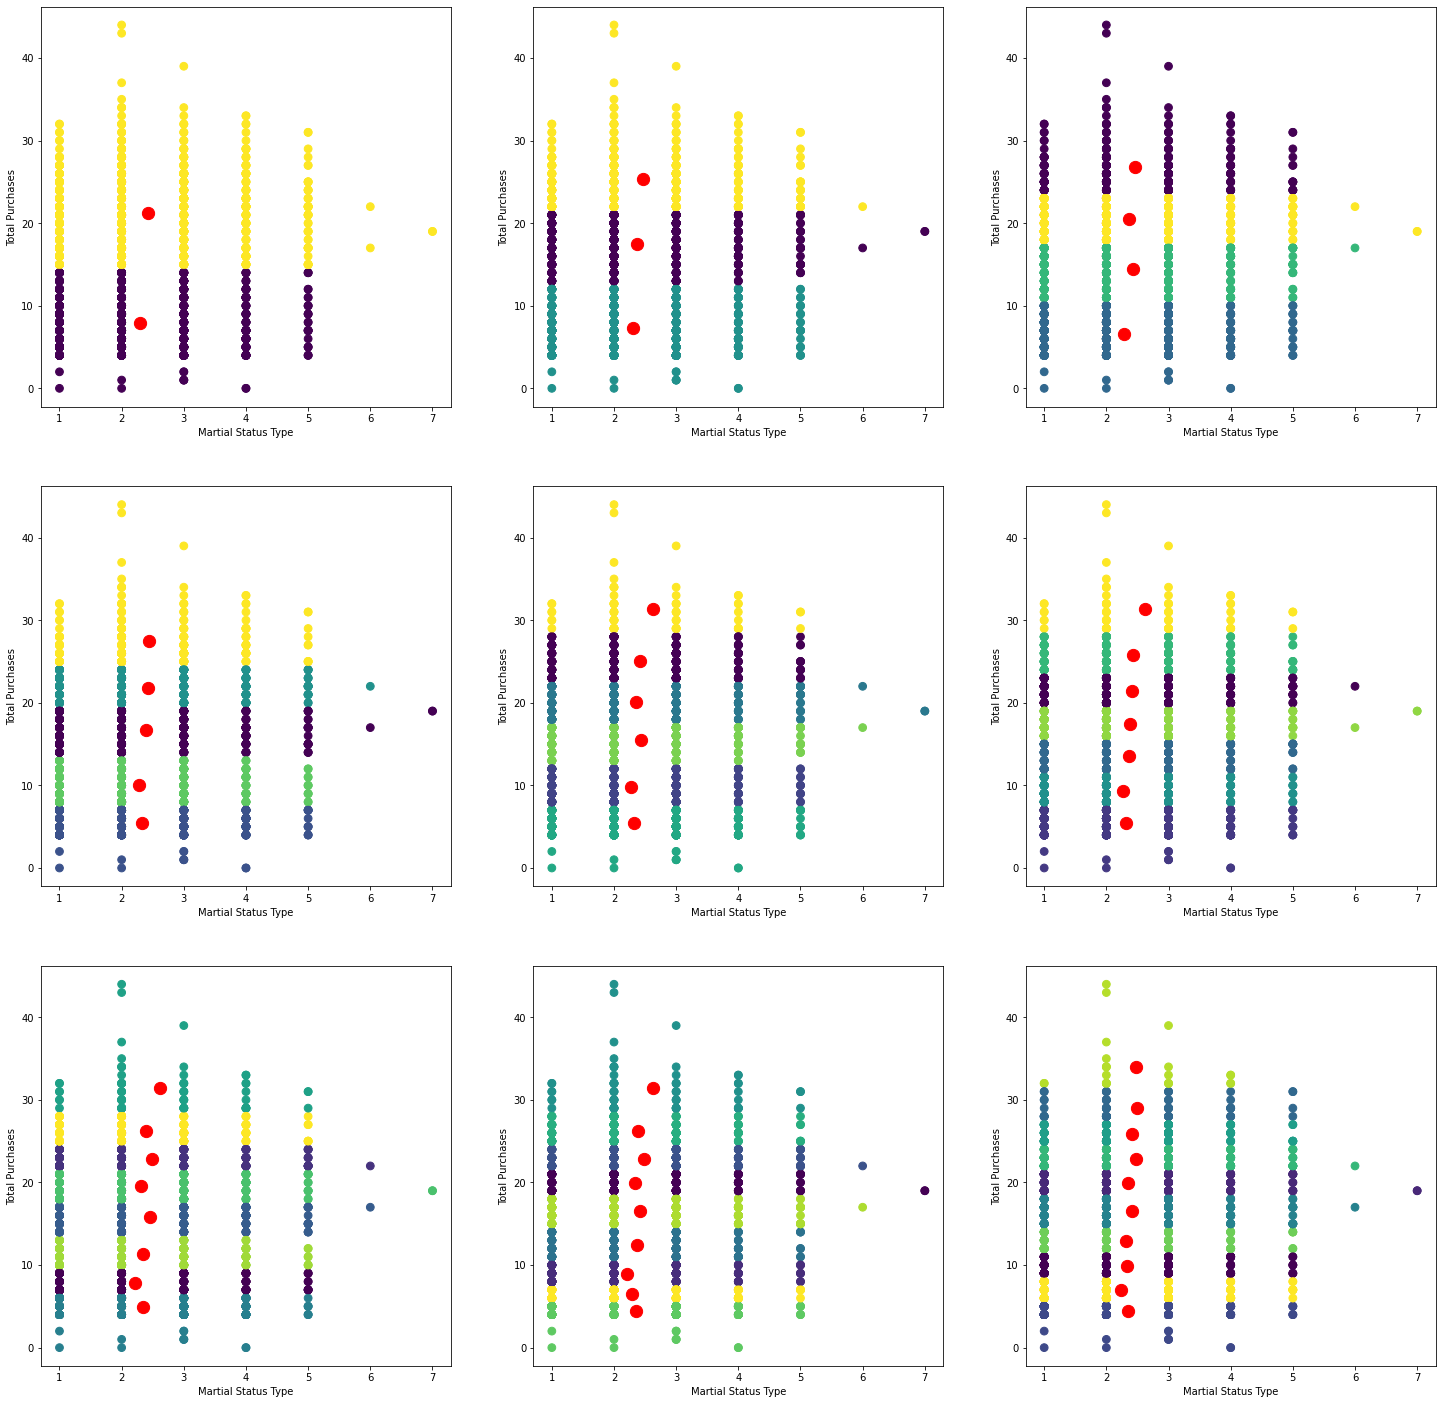

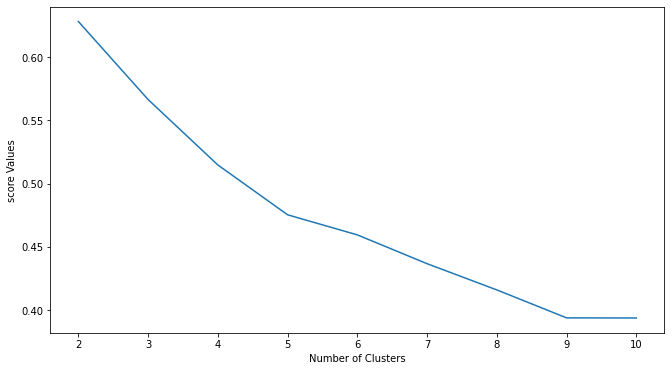

In [ ]:
fig1 = plt.figure(figsize=(25, 25))
ms_score_values = []
for i in range(2, 11):
  ms_centroids, ms_score, ms_label = KMeansAlgorithm(ms_df, i)
  ms_score_values.append(ms_score)

  sub = fig1.add_subplot(330 + i - 1)
  sub.scatter(ms_df["Marital_Status"], ms_df["total_purchases"], s=60, c=df["label"],)
  sub.scatter(ms_centroids["X"], ms_centroids["Y"], s=150, c="r")
  sub.set_xlabel('Martial Status Type')
  sub.set_ylabel('Total Purchases')


plt.figure(figsize = (11 ,6))
plt.plot(np.arange(2,11) , ms_score_values)
plt.xlabel("Number of Clusters")
plt.ylabel("score Values")

From the above sihloette score graph, we can see that we should chose 6 clusters for our KMeans graph. This allows us to maximize the amount of inter-cluster distance and to minimize the intra-cluster distance.

Text(0, 0.5, 'score Values')

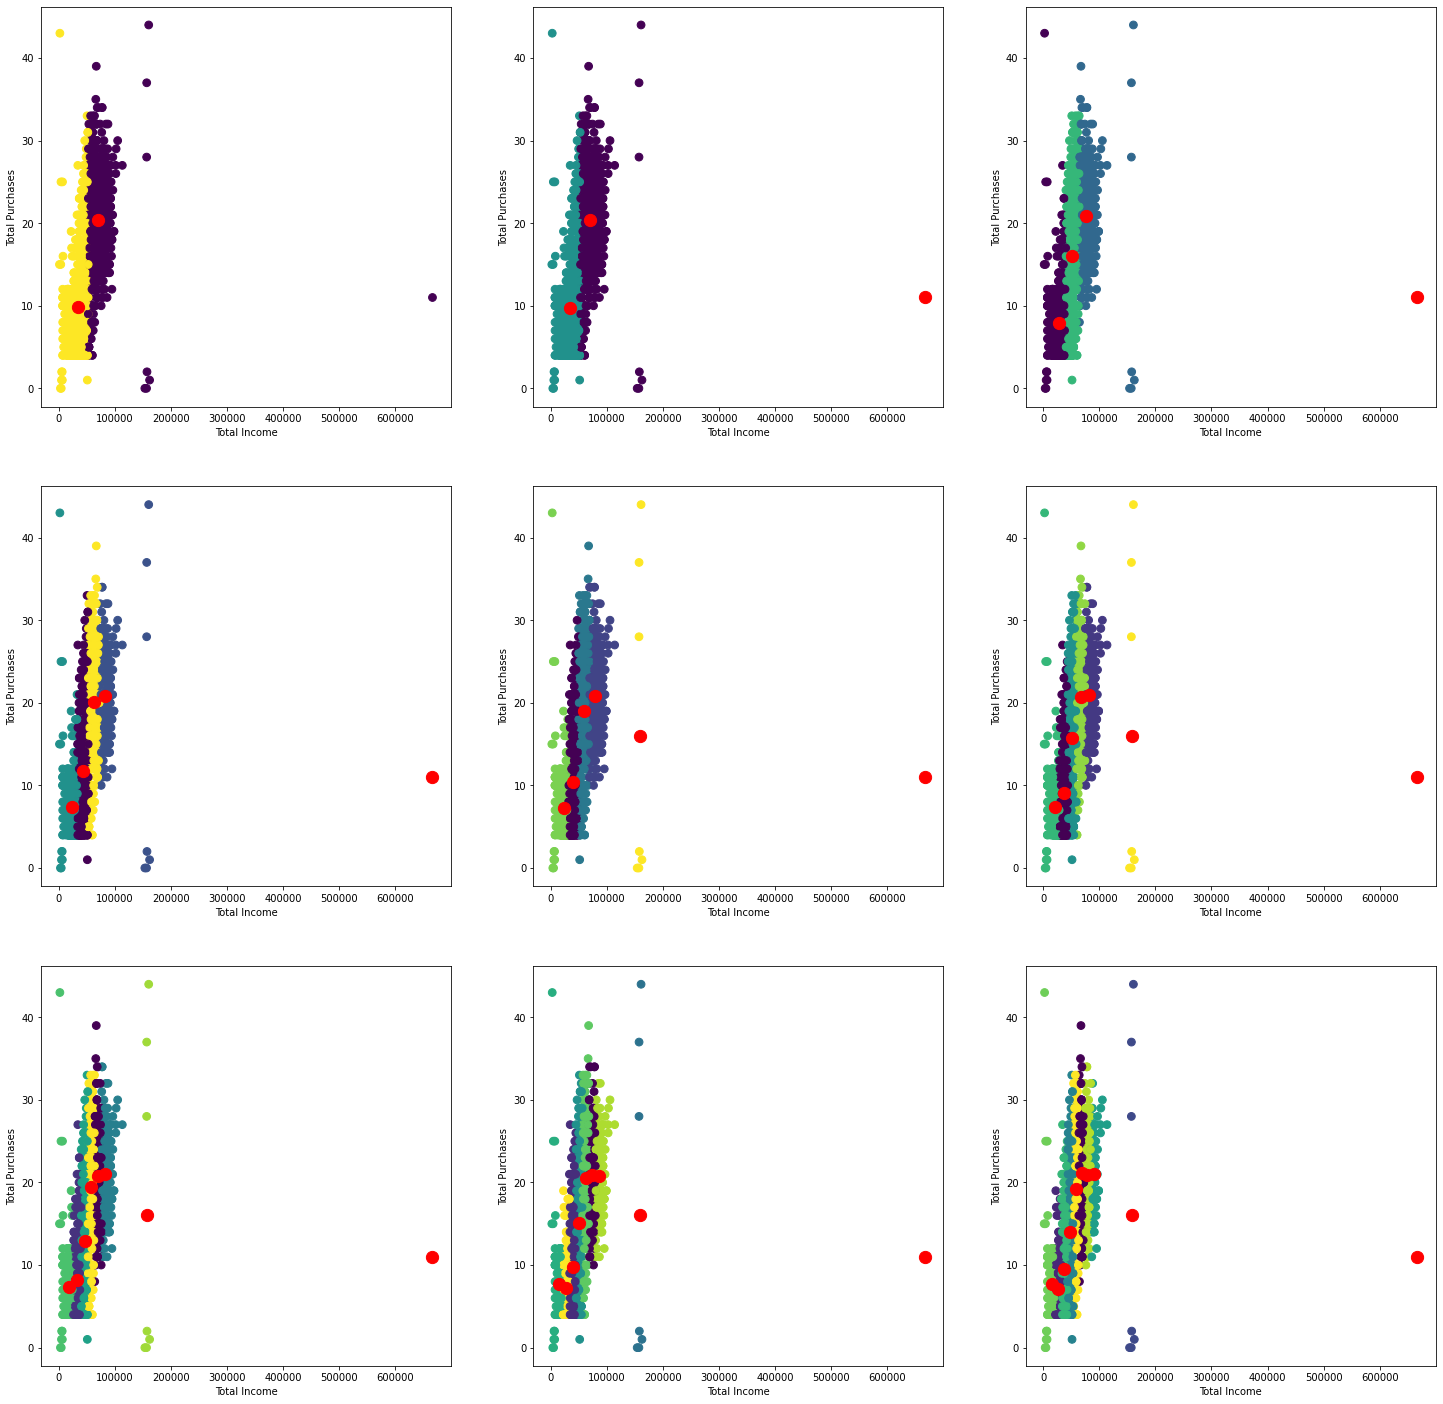

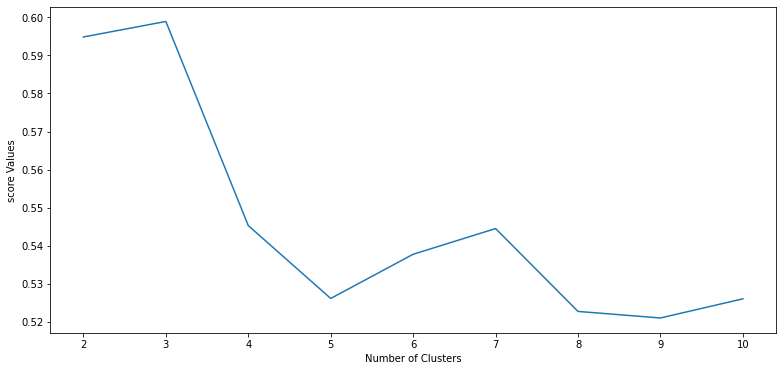

In [ ]:
fig1 = plt.figure(figsize=(25, 25))
income_score_values = []
for i in range(2, 11):
  income_centroids, income_score, income_label = KMeansAlgorithm(income_df, i)
  income_score_values.append(income_score)

  sub = fig1.add_subplot(330 + i - 1)
  sub.scatter(income_df["Income"], income_df["total_purchases"], s=60, c=df["label"],)
  sub.scatter(income_centroids["X"], income_centroids["Y"], s=150, c="r")
  sub.set_xlabel('Total Income')
  sub.set_ylabel('Total Purchases')


plt.figure(figsize = (13 ,6))
plt.plot(np.arange(2,11) , income_score_values)
plt.xlabel("Number of Clusters")
plt.ylabel("score Values")

Below are the graphs with the optimized clusters from the sihlouette values we found before.

Text(0, 0.5, 'Total Purchases')

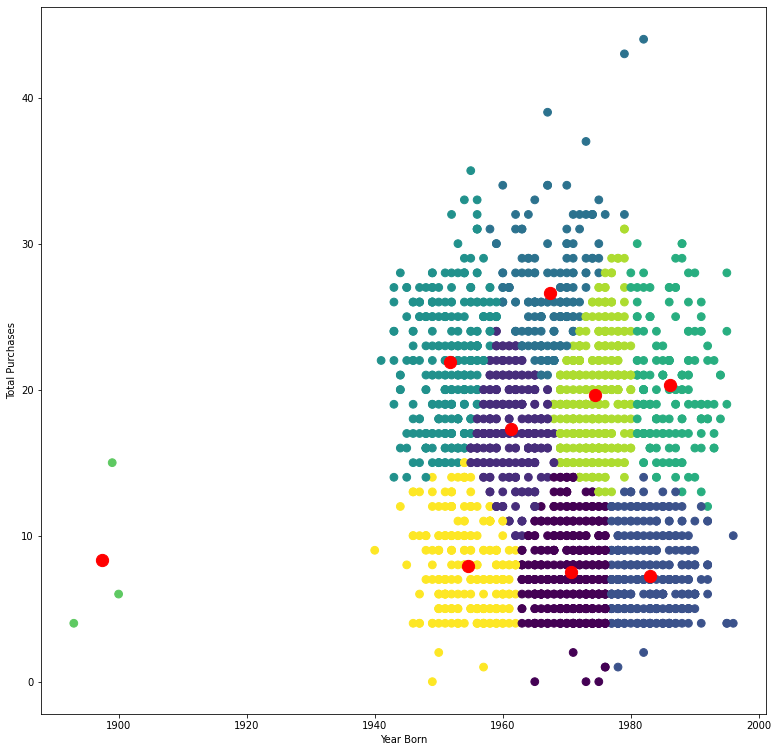

In [ ]:
birth_centroids2, birth_score2, birth_label2 = KMeansAlgorithm(birth_df,9)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(birth_df["Year_Birth"], birth_df["total_purchases"], s=60, c=df["label"])
plt.scatter(birth_centroids2["X"], birth_centroids2["Y"], s=150, c="r")
plt.xlabel('Year Born')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Purchases')

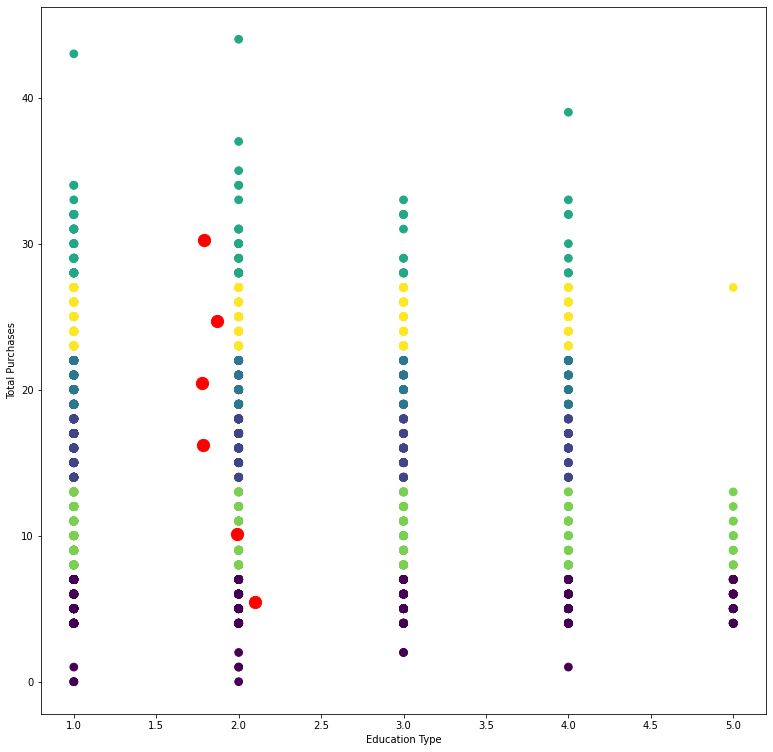

In [ ]:
edu_centroids2, edu_score2, edu_label2 = KMeansAlgorithm(edu_df,6)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(edu_df["Education"], edu_df["total_purchases"], s=60, c=df["label"])
plt.scatter(edu_centroids2["X"], edu_centroids2["Y"], s=150, c="r")
plt.xlabel('Education Type')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Purchases')

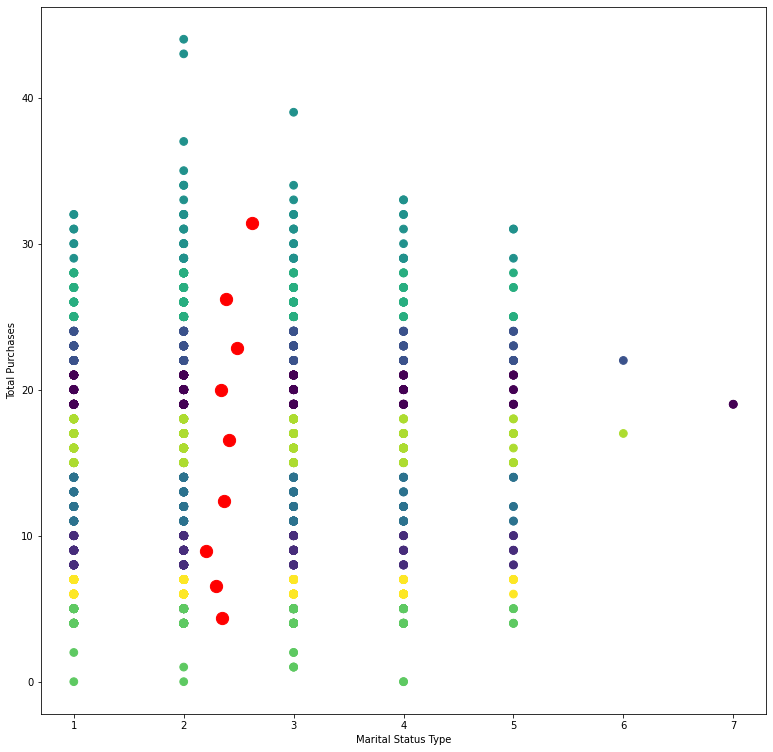

In [ ]:
ms_centroids2, ms_score2, ms_label2 = KMeansAlgorithm(ms_df,9)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(ms_df["Marital_Status"], ms_df["total_purchases"], s=60, c=df["label"])
plt.scatter(ms_centroids2["X"], ms_centroids2["Y"], s=150, c="r")
plt.xlabel('Marital Status Type')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Purchases')

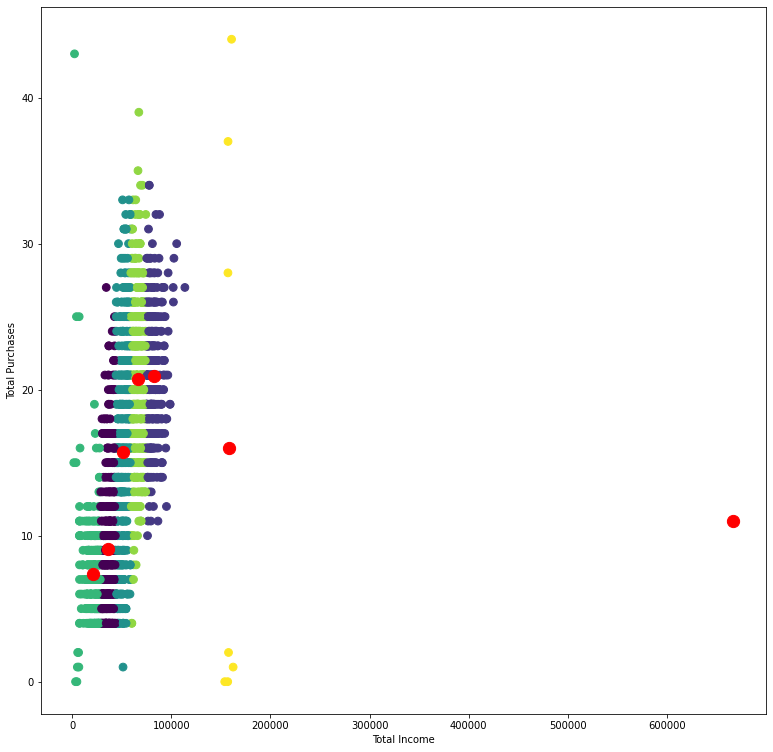

In [ ]:
income_centroids2, income_score2, income_label2 = KMeansAlgorithm(income_df,7)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(income_df["Income"], income_df["total_purchases"], s=60, c=df["label"])
plt.scatter(income_centroids2["X"], income_centroids2["Y"], s=150, c="r")
plt.xlabel('Total Income')
plt.ylabel('Total Purchases')